# Primeros pasos

En este tutorial vamos a conocer los usos mas utilizados con pandas para explorar nuestros datasets.

Recordemos que el análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

* Resumir las principales características del conjunto de datos.
* Entender mejor el conjunto de datos que se está tratando.
* Establecer relaciones entre variables.
* Determinar si una variables es un buen predictor de una variable blanco.
* Extraer las variables más importantes.

En primer lugar, vamos a cargar el dataset de caractarísticas de carros.

In [0]:
# importamos librerias
import pandas as pd
import numpy as np

# librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
file = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

El primer paso es cargar el dataset que esta en formato csv y el segundo paso es visualizar las primeras 5 filas con el metodo head

In [3]:
# creamos un dataframe y visualizamos el dataset
df = pd.read_csv(file)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Si queremos seleccionar una columna del dataset solo es necesario realizarlo de la siguiente manera <code>df['nombre_columna']</code>

In [11]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
196   -1
197   -1
198   -1
199   -1
200   -1
Name: symboling, Length: 201, dtype: int64

Para seleccionar mas de una columna se realiza de esta forma <code>df[['columna1','columna2', .. ]]</code>

In [12]:
df[['make','aspiration']]

,make,aspiration
0,alfa-romero,std
1,alfa-romero,std
2,alfa-romero,std
3,audi,std
4,audi,std
...,...,...
196,volvo,std
197,volvo,turbo
198,volvo,std
199,volvo,turbo


Es muy importante saber que datos estan vacios (en Python lo identificamos con *na*). Para saberlo realizamos lo siguiente

In [7]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

Ahora tenemos que averiguar que tipo de variables hay en el dataset

In [8]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Ademas, es importante realizar una exploración de los datos. La estadística  nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas

In [9]:
# Para dar una descripción estadística de variables numéricas:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [10]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Con pandas tambien podemos graficar. Para ello vamos a graficar en una torta la cantidad de tipos de traccion

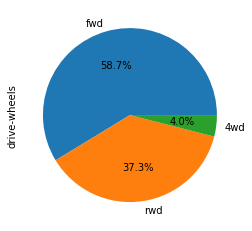

In [15]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%')

Tambien podemos realizar filtros a nuestro dataset. Por ejemplo, vamos a obtener los carros que el tamaño del motor (engine-size) sea mayor a 130

In [16]:
df[ df['engine-size'] > 130 ]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


Y si queremos guardar ese resultado a otro dataframe, solo es necesario crear una nueva variable

In [17]:
new_df = df[ df['engine-size'] > 130 ]
new_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1


## Box Plots

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

* La distribución de los datos.
* Asimetría.
* Los puntos aislados.

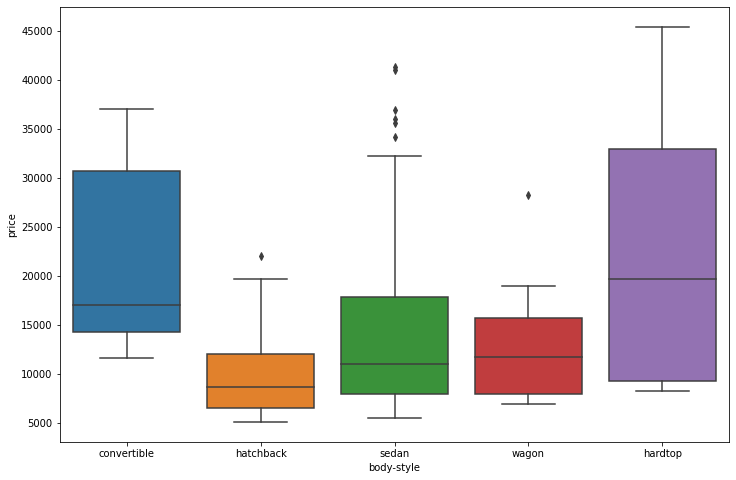

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="body-style",y="price", data=df)

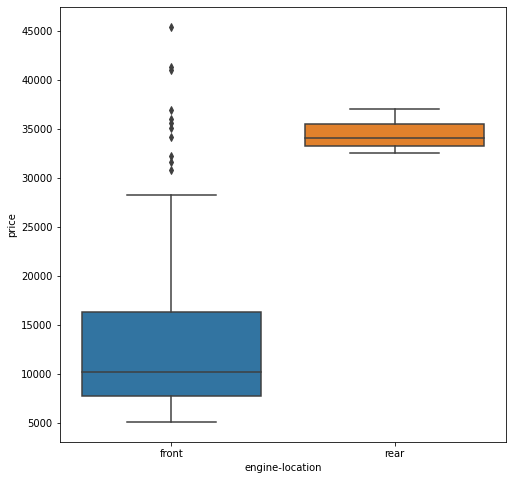

In [22]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="engine-location",y="price", data=df)

## Groupby

 con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales.


Ahora realicemos un nuevo dataframe con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [24]:
df_group = df[['drive-wheels','body-style','price']]
df_group.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [27]:
# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [28]:
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


In [29]:
# tambien podemos cambiar el metodo en el que se ordenan
df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "drive-wheels", ascending = False).reset_index(drop = True)

,drive-wheels,body-style,price
0,rwd,convertible,23949.600000
1,rwd,hardtop,24202.714286
2,rwd,hatchback,14337.777778
3,rwd,sedan,21711.833333
4,rwd,wagon,16994.222222
5,fwd,convertible,11595.000000
6,fwd,hardtop,8249.000000
7,fwd,hatchback,8396.387755
8,fwd,sedan,9811.800000
9,fwd,wagon,9997.333333


## Correlación

La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [30]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [31]:
df.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. como tenemos tantas columnas solo vamos a graficar algunas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe64d4e6048>,
      dtype=object)

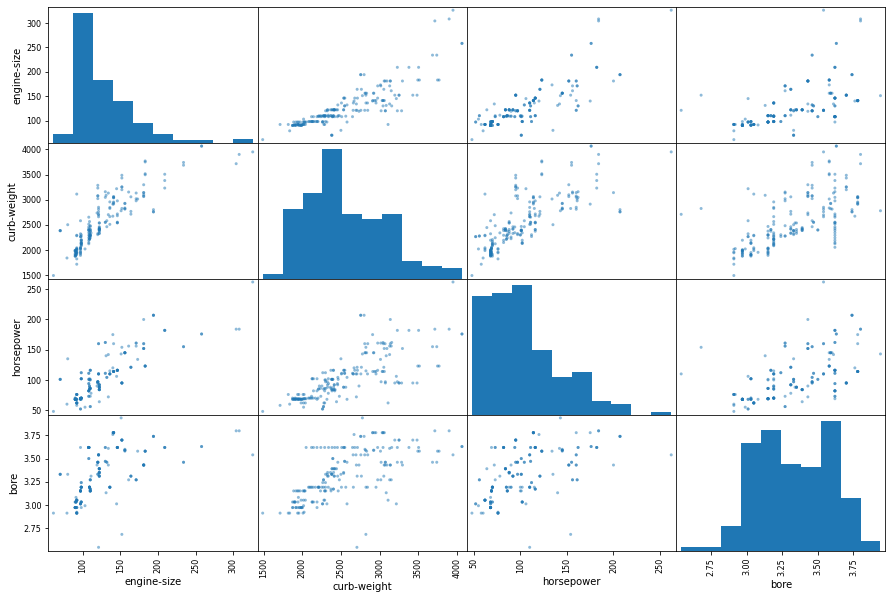

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["engine-size","curb-weight","horsepower","bore"]
scatter_matrix(df[attributes], figsize=(15, 10))

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

Por ultimo, la librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

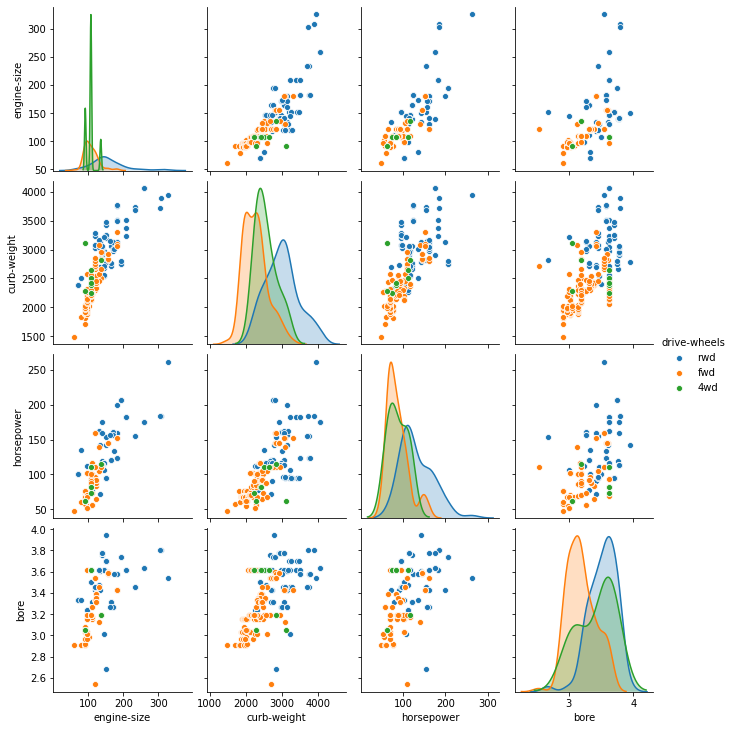

In [47]:
# podemos poner variable categoricas con el hue

sns.pairplot(df, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","bore"],height=2.5, aspect=0.9) 